<a href="https://colab.research.google.com/github/gunagvn/Guna_ML_model/blob/main/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [ ]:
df[list1] = df[list1].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
list2 = ['price','area']

In [ ]:
df[list2] = scaler.fit_transform(df[list2])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
df.dtypes

,0
price,float64
area,float64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [ ]:
corel = df.corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

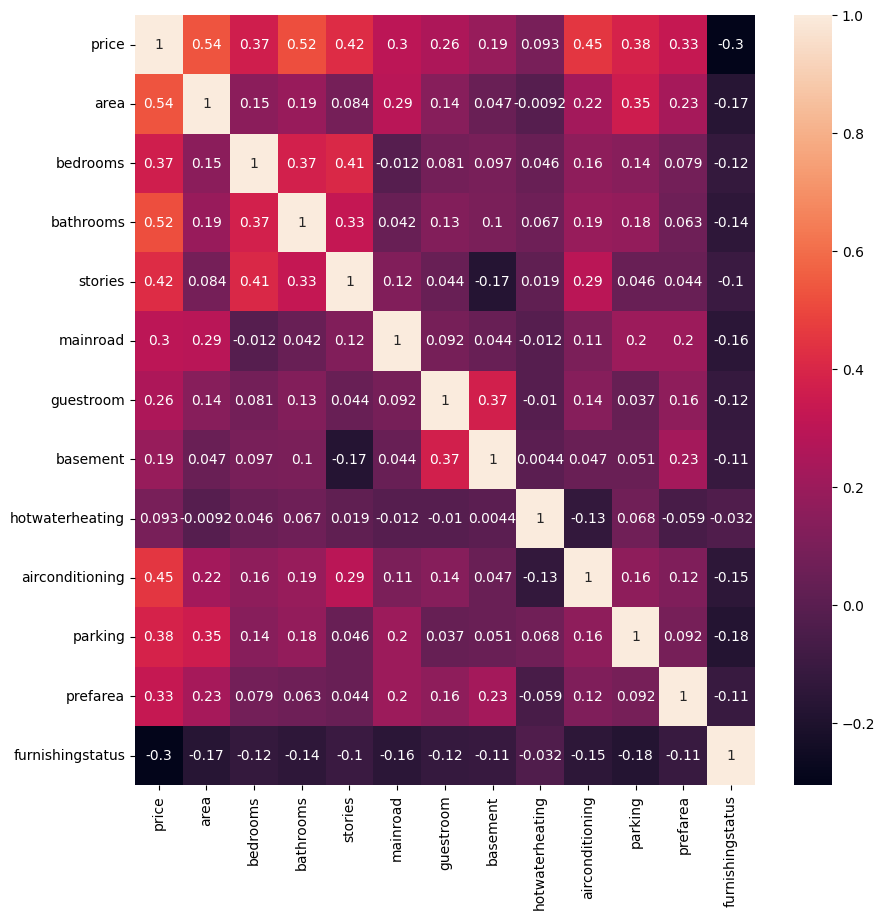

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corel, annot=True)

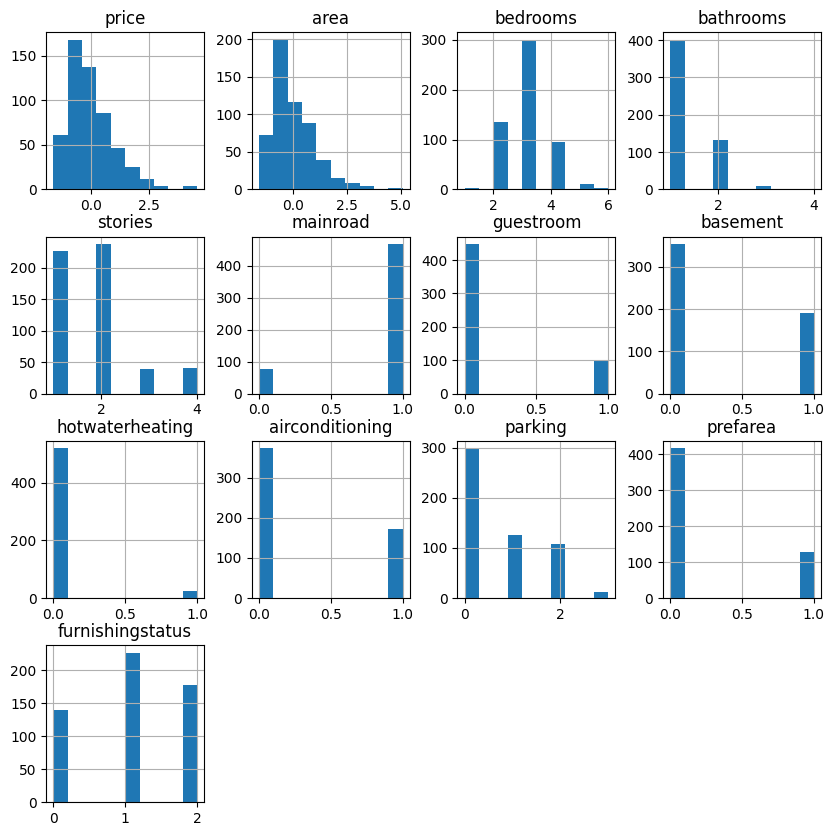

In [ ]:
df.hist(figsize=(10,10),bins=10)
plt.show()

In [ ]:
x = df.drop('price',axis=1)
y = df['price']

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,-1.033389,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
y

,price
0,4.566365
1,4.004484
2,4.004484
3,3.985755
4,3.554979
...,...
540,-1.576868
541,-1.605149
542,-1.614327
543,-1.614327


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linr = LinearRegression()

In [ ]:
linr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict = linr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
linr_score = r2_score(y_test,y_predict)


In [ ]:
linr_accuracy = linr.score(x_test,y_test)

In [ ]:
linr_accuracy

0.6494754192267794